Quick file to demonstrate the formalism outlined here https://journals.aps.org/prxquantum/abstract/10.1103/PRXQuantum.3.020201

In [61]:
import numpy as np
import matplotlib.pyplot as plt

π = np.pi

First, just a simple mode in reflection. The matrix equation becomes just a scalar equation (see page 4)

$$
-i \gamma_A \Delta_A a\left[\omega_A^s\right]=\sqrt{\gamma_A^{\mathrm{ext}}} a^{\mathrm{in}}\left[\omega_A^s\right]
$$

We combine this with the following (just a scalar version of Eq. 7)

$$
S=i \frac{1}{\gamma_0} K \frac{1}{M} K- 1
$$

to get the single scattering parameter. 

This gives us (using definitions from paper)

$$
S = \frac{i \gamma_{ext} }{\omega^s - \omega - \frac{i \gamma}{2} } - 1
$$



In [62]:
ωs = np.linspace(3e9, 9e9, 101)*2*π
γint = 2e9*2*π
γext = 1e9*2*π
γ = γint + γext
ω = 6e9*2*π

In [63]:
S = 1j* γext / (ωs - ω + 1j*γ/2) - 1

Text(0, 0.5, '$S_{11}$ Phase')

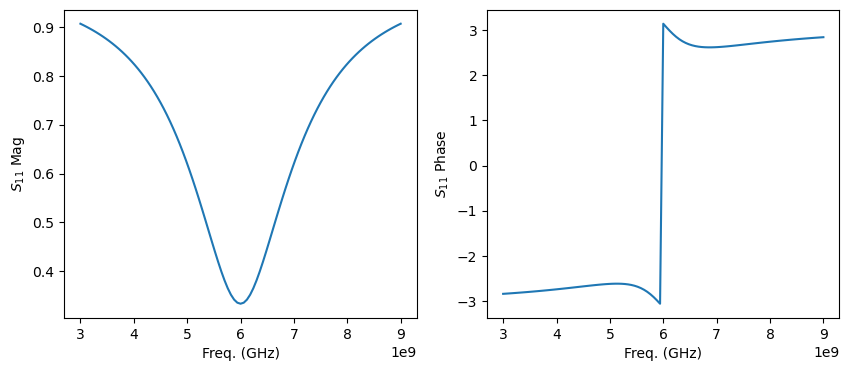

In [64]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10,4))
axs[0].plot(ωs/(2*π), np.abs(S))
axs[0].set_xlabel('Freq. (GHz)')
axs[0].set_ylabel('$S_{11}$ Mag')

axs[1].plot(ωs/(2*π), np.angle(S))
axs[1].set_xlabel('Freq. (GHz)')
axs[1].set_ylabel('$S_{11}$ Phase')

Cool. Now let's imagine a mode structure of two passively coupled modes with different external losses. Nothing parametric yet.

Again, no conjugation, so we don't need the "dagger modes".

In [59]:
ω1 = np.linspace(3e9, 9e9, 101)*2*π
ωs =  2e9*2*π
ωo =  2e9*2*π
g2 =  2e9*2*π

γs_ext = 2e9*2*π
γs_int = 2e9*2*π
γo_ext = 2e9*2*π
γo_int = 2e9*2*π

γs = γs_int + γs_ext
γo = γo_int + γo_ext

In [60]:
M11 = ω1 - ωs + 1j*γs/2
M21 = g2/2
M12 = g2/2
M22 = ω1 - ωo + 1j*γo/2

det = M11*M22 - M21*M12
Minv11 = M22/det
Minv21 = -M21/det
Minv12 = -M12/det
Minv22 = M11/det

S11 = 1j*np.sqrt(γs_ext*γs_ext)*Minv11